In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('armani')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('armani', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
1271,1271,1225376087280099328,1580987400,2020-02-06 11:10:00,alejandro_dsign,¿Qué tal este look de Cody Simpson?😱 La elega...,none,0.0,NaN,NaN,...,39378,453,130,NaN,2015-04-01 17:36:32,armani,Fashion; Musican; Look; AlejandroBetancourt,False,¿Qué tal este look de Cody Simpson? La eleganc...,look cody simpson elegancia traje confeccionad...
4067,4067,1225439001848377345,1581002400,2020-02-06 15:20:00,alejandro_dsign,¿Qué tal este look de Cody Simpson?😱 La elega...,none,0.0,NaN,NaN,...,39378,453,130,NaN,2015-04-01 17:36:32,armani,Fashion; Musican; Look; AlejandroBetancourt,False,¿Qué tal este look de Cody Simpson? La eleganc...,look cody simpson elegancia traje confeccionad...
8853,8853,1225512069375692800,1581019820,2020-02-06 20:10:20,joebayy,RT @joebayy: Check out Giorgio Armani women’s ...,none,0.0,NaN,NaN,...,1608,49,110,NaN,2016-03-27 03:53:39,joebayy; eBay,Ebay; OnSale; Amazon; Fashion; Poshmark; ForSa...,True,Check out Giorgio Armani women’s double breast...,check giorgio woman double breasted metallic ...
8854,8854,1225512074119434245,1581019822,2020-02-06 20:10:22,joebayy,RT @joebayy: Check out Giorgio Armani women’s ...,none,0.0,NaN,NaN,...,1608,49,110,NaN,2016-03-27 03:53:39,joebayy,Ebay; OnSale; Amazon; Fashion; Poshmark; ForSa...,True,Check out Giorgio Armani women’s double breast...,check giorgio woman double breasted metallic ...
8855,8855,1225512085255327744,1581019824,2020-02-06 20:10:24,joebayy,RT @joebayy: Giorgio Armani women’s double bre...,none,0.0,NaN,NaN,...,1608,49,110,NaN,2016-03-27 03:53:39,joebayy,Ebay; OnSale; Amazon; Fashion; Poshmark; ForSa...,True,Giorgio Armani women’s double breasted Metalli...,giorgio woman double breasted metallic jacket...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['23rd',
 'accuse',
 'acqua',
 'alejandrobetancou',
 'all',
 'amazon',
 'announce',
 'annullare',
 'armano',
 'así',
 'be',
 'beauty',
 'black',
 'box',
 'boyfriend',
 'brand',
 'breasted',
 'business',
 'cancel',
 'cancellare',
 'case',
 'causa',
 'cautivador',
 'cerrado',
 'cet',
 'chanel',
 'chaqueta',
 'chiuso',
 'claim',
 'classico',
 'close',
 'clothing',
 'coa',
 'coat',
 'code',
 'cody',
 'collection',
 'color',
 'come',
 'confeccionado',
 'conference',
 'conquistar',
 'conspiracy',
 'controversy',
 'corona',
 'coronavirus',
 'coronavirusitalio',
 'coronavíru',
 'covid19',
 'creatase',
 'credits',
 'dapper',
 'dapperdan',
 'dapperday',
 'dark',
 'day',
 'de',
 'desfile',
 'designer',
 'dior',
 'diseño',
 'door',
 'double',
 'drive',
 'défilé',
 'eau',
 'ebay',
 'ebayer',
 'ebayseller',
 'elegancia',
 'eleonoradegray',
 'emporio',
 'empty',
 'eu',
 'evento',
 'exchange',
 'fall',
 'fallwinter2020',
 'fashion',
 'fashionblogger',
 'fashionista',
 'fashionweek',
 'fear',
 'febbrai

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

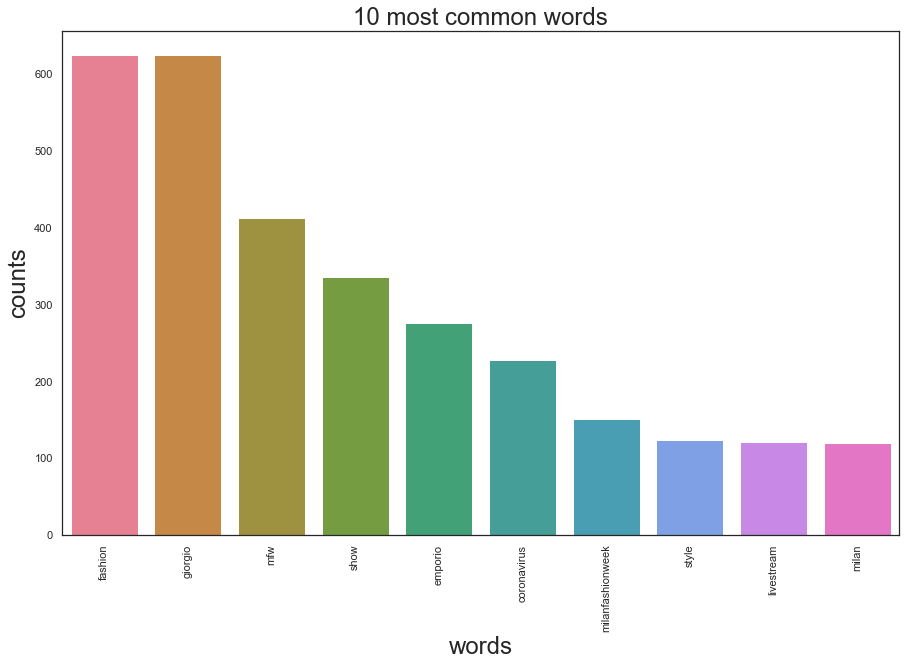

In [8]:
plot_10_most_common_words(tf,vectorizer)

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 3
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -45110.289589407854
Perplexity:  102.32156017922865
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 3, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [13]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
mfw giorgio fashion moda collection look black desfile milanfashionweek mondaymotivation latest come show yesterday today size emporio ebay say color

Topic #1:
fashion giorgio prada mfw day virus be go close last first door claim hold show happy conspiracy announce livestream corona

Topic #2:
giorgio fashion emporio show mfw coronavirus milan style italy milanfashionweek mfy fall love empty fw20 beauty fashionweek live runway theater


In [14]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

What's interesting here is the strong presence of Coronavirus and also the appearance of Sustainability.

We can save the model so not to have to generate it again

In [15]:
pyLDAvis.save_html(LDAvis_prepared, './armani'+ str(number_of_topics) +'.html')

We look at the probabilities to belong to each topic for each document and add them to the dataframe.

In [16]:
df = pd.DataFrame(columns=['topic','word'])

In [17]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [18]:
df.to_csv('topic_word_armani.csv')